# Reading an NWB file with Neo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from os.path import exists
from urllib.request import urlretrieve

from neo.io import NWBIO

## Download data file from Allen Institute

In [2]:
url = "http://download.alleninstitute.org/informatics-archive/prerelease/H19.28.012.11.05-2.nwb"
local_filename = url.split("/")[-1]
if not exists(local_filename):
    local_filename, headers = urlretrieve(url)

## Load the data

We are using "lazy" mode to save memory: this reads all the metadata, but reading the actual data is delayed until needed, so only two signals (stimulus + response) are read into memory at one time.

In [3]:
io = NWBIO(local_filename)

In [4]:
blocks = io.read(lazy=True)

In [5]:
blocks

[Block with 1 segments
 name: 'default'
 description: 'PLACEHOLDER'
 annotations: {'session_start_time': datetime.datetime(2019, 4, 18, 3, 41, 56, 136000, tzinfo=tzoffset(None, -25200)),
   'identifier': '1ed51563e8f0218c0270ee9fb6c27b0b1558c4b821c10be2756797a697b35ff3',
   'timestamps_reference_time': datetime.datetime(2019, 4, 18, 3, 41, 56, 136000, tzinfo=tzoffset(None, -25200)),
   'experiment_description': 'PatchMaster v2x90.3, 19-Mar-2018',
   'session_id': 'PLACEHOLDER',
   'source_script': {'git_revision': '() ',
    'package_version': '0.16.2',
    'repo': 'https://github.com/AllenInstitute/ipfx'},
   'source_script_file_name': 'run_x_to_nwb_conversion.py',
   'session_description': 'PLACEHOLDER'}
 file_origin: '/var/folders/2k/mhzyfkfs7h76v3pfyjbksb540000gq/T/tmpxsvu295j'
 rec_datetime: datetime.datetime(2019, 4, 18, 3, 41, 56, 136000, tzinfo=tzoffset(None, -25200))
 # segments (N=1)
 0: Segment with 126 analogsignals
    name: 'default'
    # analogsignals (N=126)
    0: Ana

In [6]:
blocks[0].annotations

{'session_start_time': datetime.datetime(2019, 4, 18, 3, 41, 56, 136000, tzinfo=tzoffset(None, -25200)),
 'identifier': '1ed51563e8f0218c0270ee9fb6c27b0b1558c4b821c10be2756797a697b35ff3',
 'timestamps_reference_time': datetime.datetime(2019, 4, 18, 3, 41, 56, 136000, tzinfo=tzoffset(None, -25200)),
 'experiment_description': 'PatchMaster v2x90.3, 19-Mar-2018',
 'session_id': 'PLACEHOLDER',
 'source_script': {'git_revision': '() ',
  'package_version': '0.16.2',
  'repo': 'https://github.com/AllenInstitute/ipfx'},
 'source_script_file_name': 'run_x_to_nwb_conversion.py',
 'session_description': 'PLACEHOLDER'}

## Plot the stimulus and response signals

In [7]:
acq_signals = blocks[0].segments[0].filter(nwb_group="acquisition")
stimuli = blocks[0].segments[0].filter(nwb_group="stimulus")
n = len(acq_signals)

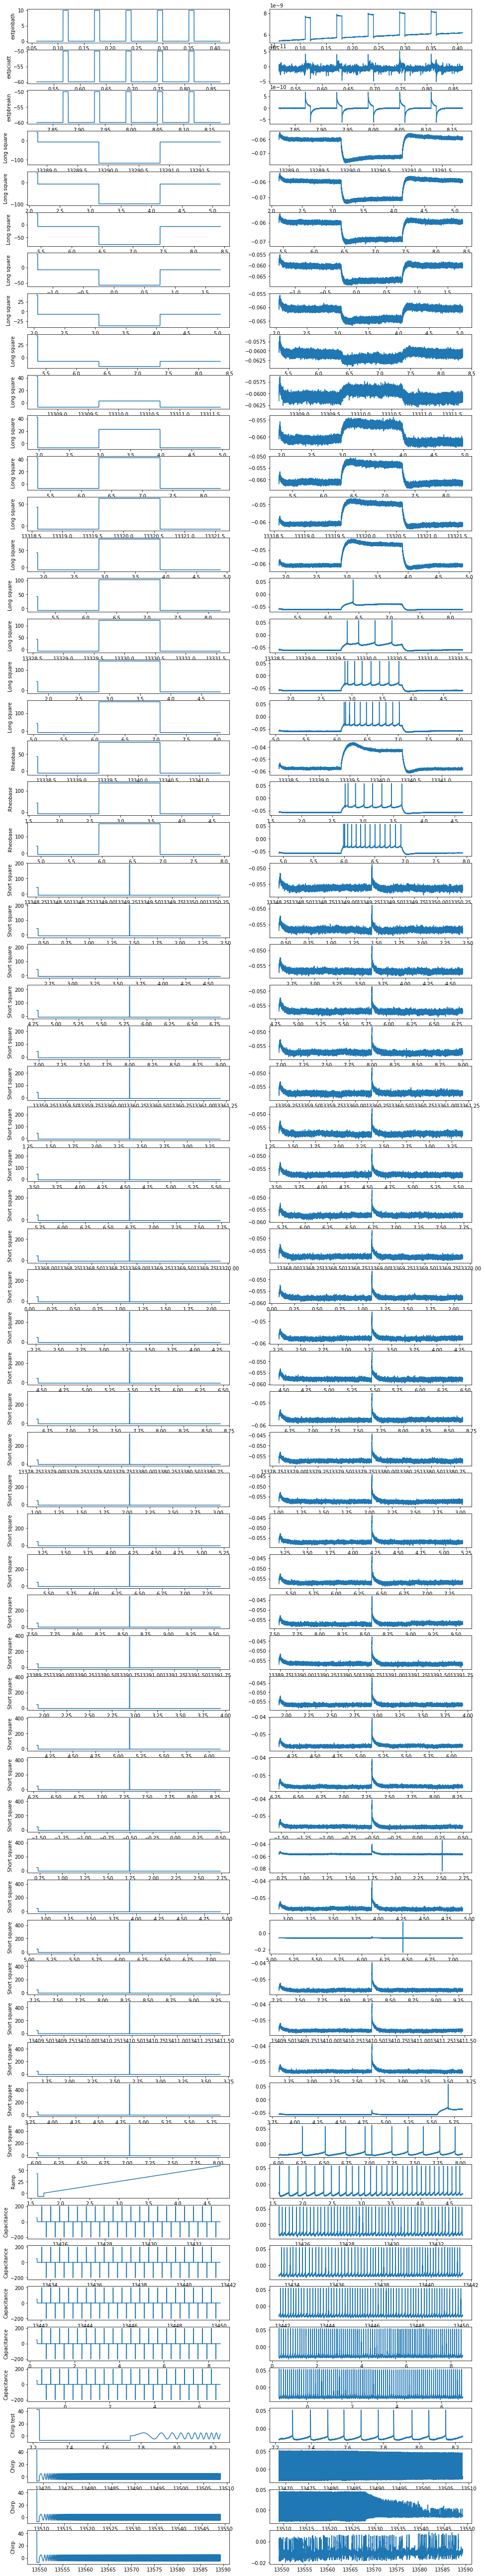

In [12]:
fig = plt.figure(figsize=(16.0, n * 1.5))
for i, (stim, sig) in enumerate(zip(stimuli, acq_signals)):
    sig = sig.load()
    stim = stim.load()
    plt.subplot(n, 2, 2 * i + 1)
    plt.plot(stim.times, stim)
    plt.ylabel(stim.annotations["series_label"])
    plt.subplot(n, 2, 2 * i + 2)
    plt.plot(sig.times, sig)

## Load data using pynwb

This is to check what metadata is currently not being loaded by Neo (Neo-NWB support is a work in progress).

In [9]:
import pynwb

In [10]:
io._file

root pynwb.file.NWBFile at 0x140364012163368
Fields:
  acquisition: {
    index_000 <class 'pynwb.icephys.VoltageClampSeries'>,
    index_001 <class 'pynwb.icephys.VoltageClampSeries'>,
    index_002 <class 'pynwb.icephys.VoltageClampSeries'>,
    index_003 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_004 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_005 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_006 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_007 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_008 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_009 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_010 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_011 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_012 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_013 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_014 <class 'pynwb.icephys.CurrentClampSeries'>,
    index_015 <class 'pynwb.icephys.CurrentClampSeries'>,
  

In [11]:
io._file.acquisition['index_000']

index_000 pynwb.icephys.VoltageClampSeries at 0x140363981660792
Fields:
  capacitance_fast: 0.0
  capacitance_slow: nan
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (70000,), type "<f4">
  description: {
    "cycle_id": 2001001,
    "file": "H19.28.012.11.05.dat",
    "group_label": "PGS4_190418_701_A01",
    "series_label": "extpinbath",
    "sweep_label": ""
}
  electrode: Electrode 0 pynwb.icephys.IntracellularElectrode at 0x140362621608176
Fields:
  description: PLACEHOLDER
  device: Unknown (value: 5)-4-1 with Unknown (value: 3) pynwb.device.Device at 0x140362621608568

  gain: 5000000.0
  rate: 199999.99999999997
  resistance_comp_bandwidth: nan
  resistance_comp_correction: nan
  resistance_comp_prediction: nan
  resolution: nan
  starting_time: 13008.059839
  starting_time_unit: seconds
  stimulus_description: extpinbath
  sweep_number: 2001001
  unit: amperes
  whole_cell_capacitance_comp: nan
  whole_cell_series_resistance_comp: nan